In [1]:
import os, json, glob, sys, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import keras.backend.tensorflow_backend as K
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Flatten, Dropout, Input, Conv1D, MaxPooling1D, GlobalMaxPool1D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

Using TensorFlow backend.
/Users/noyeongdan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/noyeongdan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/noyeongdan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/noyeongdan/opt/anacond

In [20]:
os.chdir("/Users/noyeongdan/형태소 분석")
data = pd.read_csv('after_prepro_8.csv')

In [21]:
data = data.drop_duplicates(['content'], keep=False) # 중복되는 모든 값 제거

In [22]:
df2 = data.sample(frac=1).reset_index(drop=True)
print(df2.iloc[0:10,2])

0    1
1    2
2    2
3    0
4    2
5    2
6    2
7    0
8    2
9    2
Name: category, dtype: int64


In [23]:
X = df2.iloc[:, 1].values
y = df2.iloc[:, 2].values

In [24]:
nb_classes = len(set(y))
print(nb_classes)
y = np_utils.to_categorical(y, nb_classes)
print(y)

3
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [25]:
max_word = 5000
max_len = 500

tok = Tokenizer(num_words = max_word)
tok.fit_on_texts(X)
print(len(tok.word_index))

64772


In [26]:
sequences = tok.texts_to_sequences(X)
print(len(sequences[0]))

177


In [27]:
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
print(sequences_matrix[0])
print(len(sequences_matrix[0]))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [28]:
print(len(tok.word_index))

X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

64772
(14716, 500)
(14716, 3)


# Bi-LSTM

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_word, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 394,499
Trainable params: 394,499
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(X_train, epochs=10,
                    validation_data=test_dataset, 

                    validation_steps=30)

NameError: name 'test_dataset' is not defined

In [39]:
bihist = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Train on 11772 samples, validate on 2944 samples
Epoch 1/5
11772/11772 [==============================] - 184s 16ms/sample - loss: 0.9692 - acc: 0.5166 - val_loss: 0.7030 - val_acc: 0.7374
Epoch 2/5
11772/11772 [==============================] - 190s 16ms/sample - loss: 0.5077 - acc: 0.8304 - val_loss: 0.3510 - val_acc: 0.8927
Epoch 3/5
11772/11772 [==============================] - 187s 16ms/sample - loss: 0.2949 - acc: 0.9045 - val_loss: 0.3073 - val_acc: 0.9008
Epoch 4/5
11772/11772 [==============================] - 181s 15ms/sample - loss: 0.2188 - acc: 0.9313 - val_loss: 0.2671 - val_acc: 0.9134
Epoch 5/5
11772/11772 [==============================] - 181s 15ms/sample - loss: 0.1727 - acc: 0.9484 - val_loss: 0.2609 - val_acc: 0.9158


In [40]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

3679/3679 [==============================] - 11s 3ms/sample - loss: 0.2469 - acc: 0.9233
정확도 : 0.9233


# 이전 방식과 동일하게 epoch수가 5일 때 정확도가 약간의 차이로 좀 더 낮고 훈련시간도 길다.

# 모델사용

In [17]:
xhat_idx=[]
print("xhat_idx: ",xhat_idx)
for i in range(len(X_test)): # X_test의 모든 인덱스를 가져온다.
    xhat_idx.append(i)
        
xhat = X_test[xhat_idx] # X_test의 모든 값들을 xhat에 넣어준다.
yhat = model.predict_classes(xhat) # xhat의 값을 model을 사용해 예측하고 예측값을 yhat에 넣는다.
    
correct = 0 # 예측이 성공한 갯수
    
all_lifeCulture=0 # test데이터 중 생활문화 카테고리의 전체 갯수
all_world=0 # test데이터 중 세계 카테고리의 전체 갯수
all_IT=0 # test데이터 중 IT과학 카테고리의 전체 갯수
    
lifeCulture=0 # test데이터 예측 후 예측이 성공한 생활문화 카테고리의 갯수
world=0 # test데이터 예측 후 예측이 성공한 세계 카테고리의 갯수
IT=0 # test데이터 예측 후 예측이 성공한 IT과학 카테고리의 갯수
for i in range(len(X_test)):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))
    # 실제 값과 예측값을 출력한다.
    if np.argmax(y_test[xhat_idx[i]]) == yhat[i]: # 예측 성공 시 correct값 1증가
        correct+=1
            
    if np.argmax(y_test[xhat_idx[i]])==0: # test데이터의 종류가 생활문화일 때 증가 
        all_lifeCulture+=1
    elif np.argmax(y_test[xhat_idx[i]])==1: # test데이터의 종류가 세계일 때 증가 
        all_world+=1
    elif np.argmax(y_test[xhat_idx[i]])==2: # test데이터의 종류가 IT과학일 때 증가 
        all_IT+=1
          
    if np.argmax(y_test[xhat_idx[i]])==yhat[i]==0: # 생활문화 카테고리 예측에 성공 시 증가 
        lifeCulture+=1
    elif np.argmax(y_test[xhat_idx[i]])==yhat[i]==1: # 세계 카테고리 예측에 성공 시 증가 
        world+=1
    elif np.argmax(y_test[xhat_idx[i]])==yhat[i]==2: # IT과학 카테고리 예측에 성공 시 증가 
        IT+=1
            
print("전체 test데이터갯수: {0}".format(len(X_test)))
print("correct : {0}".format(correct))
    
print("생활문화: {0}/{1}".format(lifeCulture,all_lifeCulture))
print("세계: {0}/{1}".format(world,all_world))
print("IT과학: {0}/{1}".format(IT,all_IT))

xhat_idx:  []
True : 2, Predict : 2
True : 0, Predict : 0
True : 0, Predict : 0
True : 0, Predict : 0
True : 1, Predict : 1
True : 0, Predict : 0
True : 2, Predict : 2
True : 1, Predict : 1
True : 1, Predict : 1
True : 0, Predict : 0
True : 0, Predict : 0
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 1, Predict : 1
True : 1, Predict : 1
True : 1, Predict : 1
True : 2, Predict : 2
True : 0, Predict : 0
True : 1, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 0
True : 0, Predict : 0
True : 1, Predict : 1
True : 1, Predict : 1
True : 0, Predict : 0
True : 1, Predict : 1
True : 1, Predict : 1
True : 1, Predict : 1
True : 0, Predict : 2
True : 0, Predict : 0
True : 0, Predict : 0
True : 0, Predict : 0
True : 1, Predict : 1
True : 1, Predict : 1
True : 2, Predict : 0
True : 0, Predict : 0
True : 0, Predict : 0
True : 0, Predict : 0
True : 2, Predict : 2
True : 0, Predict : 0
True : 0, Predict : 2
True : 0, Predict : 0
True : 1, Predict 

True : 0, Predict : 0
True : 1, Predict : 1
True : 1, Predict : 1
True : 0, Predict : 0
True : 0, Predict : 0
True : 2, Predict : 2
True : 0, Predict : 0
True : 1, Predict : 1
True : 0, Predict : 0
True : 1, Predict : 1
True : 0, Predict : 0
True : 1, Predict : 1
True : 0, Predict : 0
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 0
True : 0, Predict : 0
True : 1, Predict : 1
True : 2, Predict : 2
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 0, Predict : 0
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 1, Predict : 1
True : 0, Predict : 0
True : 1, Predict : 1
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 2, Predict : 2
True : 1, Predict : 1
True : 1, Predict : 1
True : 1, Predict : 1
True : 2, 

True : 0, Predict : 0
True : 0, Predict : 0
True : 1, Predict : 1
True : 1, Predict : 1
True : 1, Predict : 1
True : 0, Predict : 0
True : 1, Predict : 1
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 2, Predict : 2
True : 1, Predict : 1
True : 2, Predict : 2
True : 2, Predict : 2
True : 1, Predict : 1
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 0, Predict : 0
True : 1, Predict : 1
True : 2, Predict : 2
True : 1, Predict : 1
True : 2, Predict : 2
True : 1, Predict : 1
True : 2, Predict : 2
True : 2, Predict : 2
True : 1, Predict : 1
True : 0, Predict : 0
True : 1, Predict : 1
True : 1, Predict : 1
True : 1, Predict : 1
True : 2, Predict : 2
True : 0, Predict : 0
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 0, Predict : 0
True : 0, Predict : 0
True : 0, Predict : 2
True : 0, Predict : 0
True : 0, Predict : 0
True : 1, Predict : 1
True : 0, Predict : 0
True : 2, Predict : 2
True : 1, Predict : 1
True : 2, 

# RNN

In [42]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [43]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_word, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Train on 11772 samples, validate on 2944 samples
Epoch 1/5
11772/11772 [==============================] - 15s 1ms/sample - loss: 0.7117 - acc: 0.6549 - val_loss: 0.5414 - val_acc: 0.7534
Epoch 2/5
11772/11772 [==============================] - 14s 1ms/sample - loss: 0.3583 - acc: 0.8719 - val_loss: 0.3459 - val_acc: 0.8842
Epoch 3/5
11772/11772 [==============================] - 14s 1ms/sample - loss: 0.2176 - acc: 0.9274 - val_loss: 0.3611 - val_acc: 0.8815
Epoch 4/5
11772/11772 [==============================] - 15s 1ms/sample - loss: 0.1240 - acc: 0.9613 - val_loss: 0.3589 - val_acc: 0.8879
Epoch 5/5
11772/11772 [==============================] - 15s 1ms/sample - loss: 0.0691 - acc: 0.9813 - val_loss: 0.4458 - val_acc: 0.8655


In [13]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_word, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 162,179
Trainable params: 162,179
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_word, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

## 과대적합(overfitting)이 일어난 듯함

In [19]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

3679/3679 [==============================] - 2s 580us/sample - loss: 0.3535 - acc: 0.8918
정확도 : 0.8918


In [44]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

3679/3679 [==============================] - 2s 579us/sample - loss: 0.4013 - acc: 0.8888
정확도 : 0.8888


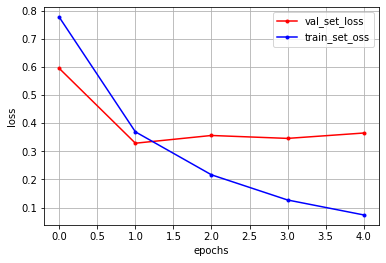

In [21]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

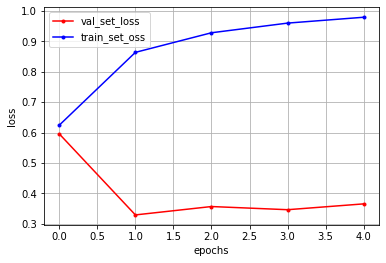

In [22]:
y_loss = history.history['acc']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# LSTM

In [29]:
import os, json, glob, sys, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import keras.backend.tensorflow_backend as K
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Flatten, Dropout, Input, Conv1D, MaxPooling1D, GlobalMaxPool1D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [30]:
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    
    model.add(Embedding(max_word, 64, input_length=max_len))
    model.add(LSTM(60, return_sequences=True))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(1.0))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    model_path = model_dir + "/lstm.model"
    checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 500, 60)           30000     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 60)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                

In [32]:
hist = model.fit(X_train, y_train, batch_size=250, epochs=5, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 11772 samples, validate on 2944 samples
Epoch 1/5
11772/11772 [==============================] - 30s 3ms/step - loss: 0.9131 - accuracy: 0.6005 - val_loss: 0.6217 - val_accuracy: 0.8560

Epoch 00001: val_loss improved from inf to 0.62173, saving model to ./model/lstm.model
Epoch 2/5
11772/11772 [==============================] - 30s 3ms/step - loss: 0.3945 - accuracy: 0.8838 - val_loss: 0.3054 - val_accuracy: 0.9025

Epoch 00002: val_loss improved from 0.62173 to 0.30537, saving model to ./model/lstm.model
Epoch 3/5
11772/11772 [==============================] - 30s 3ms/step - loss: 0.2080 - accuracy: 0.9400 - val_loss: 0.2465 - val_accuracy: 0.9161

Epoch 00003: val_loss improved from 0.30537 to 0.24650, saving model to ./model/lstm.model
Epoch 4/5
11772/11772 [==============================] - 32s 3ms/step - loss: 0.1435 - accuracy: 0.9595 - val_loss: 0.2565 - val_accuracy: 0.9171

Epoch 00004: val_loss did not improve from 0.24650
Epoch 5/5
11772/11772 [====================

In [33]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

3679/3679 [==============================] - 5s 1ms/step
정확도 : 0.9326


# Dropout 하나 삭제

In [19]:
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    
    model.add(Embedding(max_word, 64, input_length=max_len))
    model.add(LSTM(60, return_sequences=True))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    model_path = model_dir + "/lstm.model"
    checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [12]:
hist = model.fit(X_train, y_train, batch_size=250, epochs=5, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 11772 samples, validate on 2944 samples
Epoch 1/5
11772/11772 [==============================] - 31s 3ms/step - loss: 0.9242 - accuracy: 0.6456 - val_loss: 0.5566 - val_accuracy: 0.8336

Epoch 00001: val_loss improved from inf to 0.55658, saving model to ./model/lstm.model
Epoch 2/5
11772/11772 [==============================] - 31s 3ms/step - loss: 0.3570 - accuracy: 0.9004 - val_loss: 0.2880 - val_accuracy: 0.9151

Epoch 00002: val_loss improved from 0.55658 to 0.28802, saving model to ./model/lstm.model
Epoch 3/5
11772/11772 [==============================] - 31s 3ms/step - loss: 0.2127 - accuracy: 0.9409 - val_loss: 0.2487 - val_accuracy: 0.9202

Epoch 00003: val_loss improved from 0.28802 to 0.24869, saving model to ./model/lstm.model
Epoch 4/5
11772/11772 [==============================] - 32s 3ms/step - loss: 0.1584 - accuracy: 0.9550 - val_loss:

In [13]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

3679/3679 [==============================] - 5s 1ms/step
정확도 : 0.9233


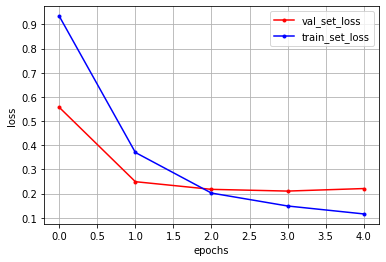

In [36]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# RNN과 LSTM의 검증 손실값

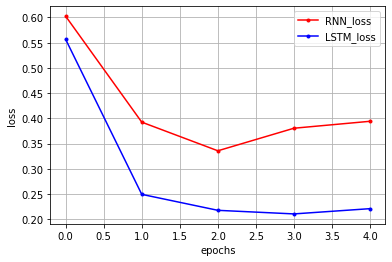

In [62]:
y_RNN_loss = history.history['val_loss']
y_LSTM_loss = hist.history['val_loss']

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_RNN_loss, marker='.', c='red', label='RNN_loss')
plt.plot(x_len, y_LSTM_loss, marker='.', c='blue', label='LSTM_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# RNN 검증 손실값

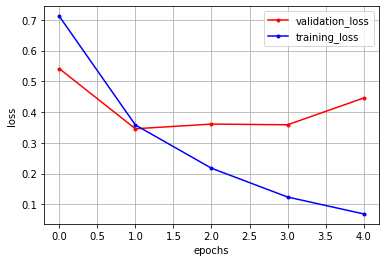

In [45]:
y_RNN_vloss = history.history['val_loss']
y_RNN_loss = history.history['loss']

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_RNN_vloss, marker='.', c='red', label='validation_loss')
plt.plot(x_len, y_RNN_loss, marker='.', c='blue', label='training_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# LSTM 검증 손실값

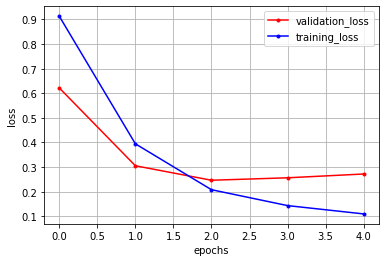

In [34]:
y_LSTM_vloss = hist.history['val_loss']
y_LSTM_loss = hist.history['loss']

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_LSTM_vloss, marker='.', c='red', label='validation_loss')
plt.plot(x_len, y_LSTM_loss, marker='.', c='blue', label='training_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# BiLSTM 검증 손실값

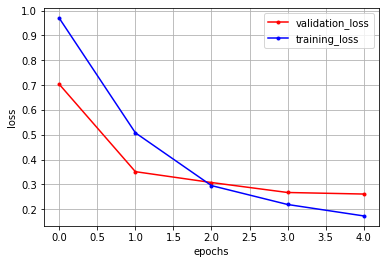

In [41]:
y_BiLSTM_vloss = bihist.history['val_loss']
y_BiLSTM_loss = bihist.history['loss']

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_BiLSTM_vloss, marker='.', c='red', label='validation_loss')
plt.plot(x_len, y_BiLSTM_loss, marker='.', c='blue', label='training_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# RNN은 과대적합(overfitting)이 일어남

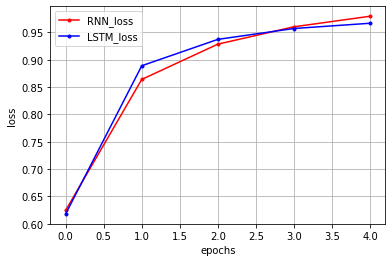

In [48]:
y_RNN_loss = history.history['acc']
y_LSTM_loss = hist.history['accuracy']

x_len = np.arange(len(y_RNN_loss))

plt.plot(x_len, y_RNN_loss, marker='.', c='red', label='RNN_loss')
plt.plot(x_len, y_LSTM_loss, marker='.', c='blue', label='LSTM_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# 세 가지 비교

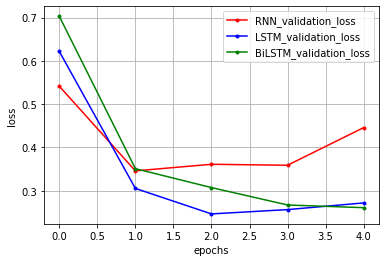

In [46]:
y_RNN_vloss = history.history['val_loss']
y_LSTM_vloss = hist.history['val_loss']
y_BiLSTM_vloss = bihist.history['val_loss']

#x_len = np.arange(len(y_RNN_loss))
x_len = np.arange(5)

plt.plot(x_len, y_RNN_vloss, marker='.', c='red', label='RNN_validation_loss')
plt.plot(x_len, y_LSTM_vloss, marker='.', c='blue', label='LSTM_validation_loss')
plt.plot(x_len, y_BiLSTM_vloss, marker='.', c='green', label='BiLSTM_validation_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()